# BREAST CANCER CLASSIFICATION

### DATASET - breast-cancer-wisconsin (https://drive.google.com/file/d/1AnRf3cl-MflHd4JVK07Az3UdvemNRU4a/view?usp=sharing)
### OBJECTIVES
This breast cancer database was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.

                                             
**Attribute Information**

| Columns | Description |
|--|--|
| Sample code number                   | id number |
| Clump Thickness                      | 1 - 10    |
| Uniformity of Cell Size              | 1 - 10    |
| Uniformity of Cell Shape             | 1 - 10  |
| Marginal Adhesion                    | 1 - 10 |
| Single Epithelial Cell Size          | 1 - 10 |
| Bare Nuclei                          | 1 - 10 |
| Bland Chromatin                      | 1 - 10 |
| Normal Nucleoli                      | 1 - 10 |
| Mitoses                              | 1 - 10 |
| Class                                | <ul><li>2: benign</li><li>4: malignant</li></ul>


Prepare a jupyter notebook (recommended - Google Colab) to build, train and evaluate a Machine Learning model on the given dataset. 

# PART A

## 1) IMPORT LIBRARIES AND DATASET

In [337]:
# Import Libraries
import pandas
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from sklearn import preprocessing
import seaborn as sns
import warnings
from sklearn import metrics

In [338]:
# Hide python warnings
warnings.filterwarnings("ignore")

In [393]:
# Define filepath
data_path = "C:\\Desktop\\ML_assignment"

In [340]:
# Read dataset
df_cancer_data = pandas.read_csv(data_path + "\\breast-cancer-wisconsin.csv")
df_cancer_data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


## 2) DATA VISUALIZATION AND EXPLORATION

### 2-a) Print 5 rows for sanity checks

In [341]:
df_cancer_data.head(5)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 2-b) Print shape and description of dataset

In [342]:
print("Dataset Rows: ", df_cancer_data.shape[0])
print("Dataset Columns: ", df_cancer_data.shape[1])

Dataset Rows:  699
Dataset Columns:  11


In [343]:
df_cancer_data.describe(include='all')

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


### 2-c) Provide appropriate visualization to get an insight about the dataset
### 2-d) Try exploring the data and see what insights can be drawn from the dataset

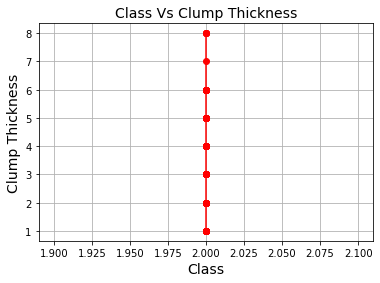

In [344]:
df_cancer_data_benign = df_cancer_data[df_cancer_data.Class == 2]
df_cancer_data_malignant = df_cancer_data[df_cancer_data.Class == 4]
  
df_cancer_data_benign = df_cancer_data_benign.sort_values(by=['Clump Thickness'])
  
plt.plot(df_cancer_data_benign['Class'], df_cancer_data_benign['Clump Thickness'], color='red', marker='o')
plt.title('Class Vs Clump Thickness', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Clump Thickness', fontsize=14)
plt.grid(True)
plt.show()

### Visualization using Box Plot

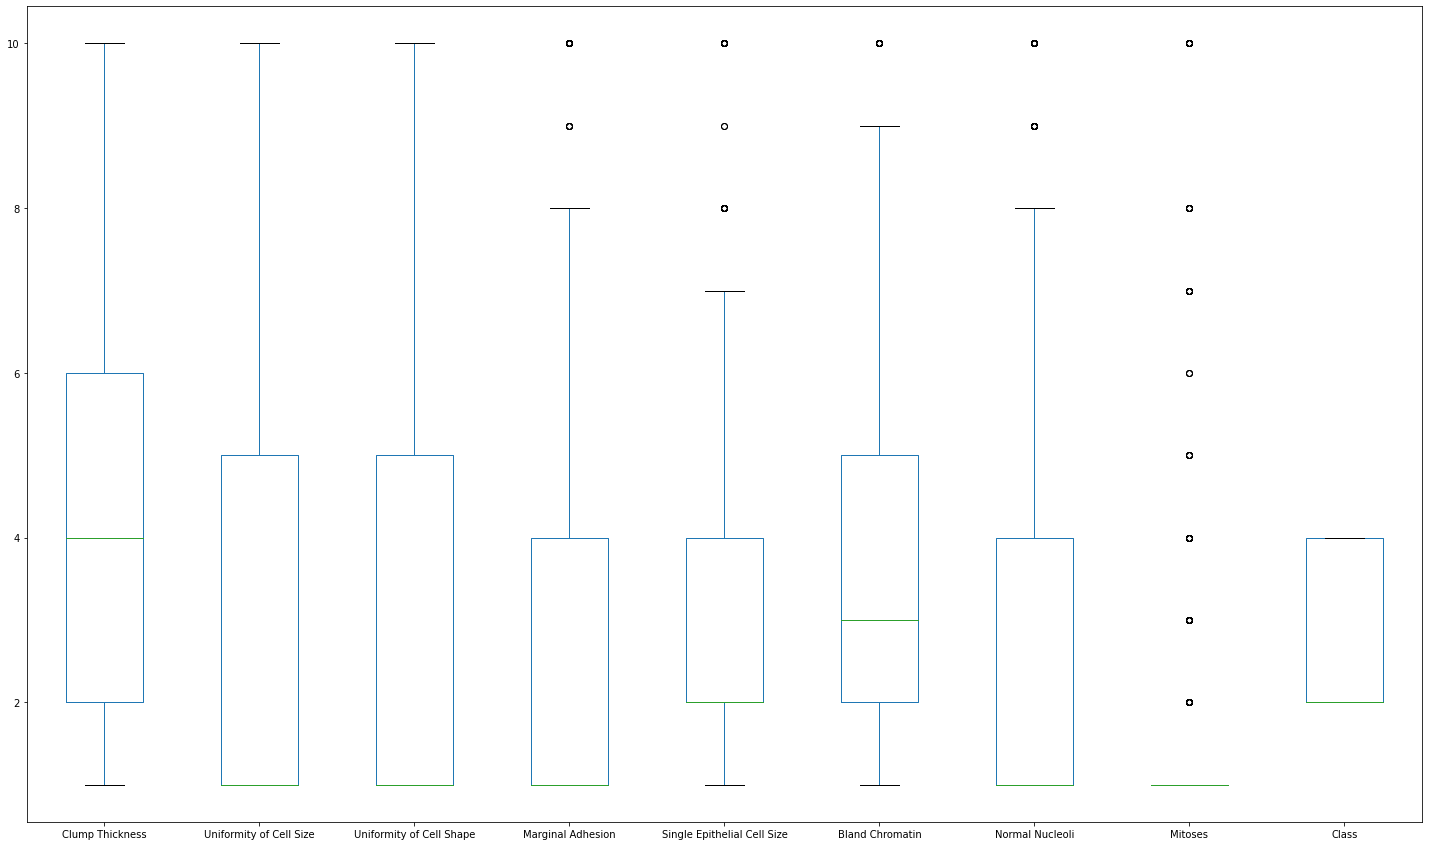

In [345]:
df_cancer_data[list(df_cancer_data.columns)[1:]].plot(kind='box', figsize =(25, 15))
plt.show()

### Total no: of patients in sample data

In [346]:
print("Total no: of patients: ", df_cancer_data.shape[0])

Total no: of patients:  699


### Patient distribution based on benign and malignant

In [347]:
df_cancer_data.groupby('Class').describe()

Sample code number                                                    \
                   count          mean            std      min         25%   
Class                                                                        
2                  458.0  1.107591e+06  723431.757966  61634.0  1002614.25   
4                  241.0  1.003505e+06  322232.308608  63375.0   832226.00   

                                        Clump Thickness            ...  \
             50%        75%         max           count      mean  ...   
Class                                                              ...   
2      1180170.5  1256870.5  13454352.0           458.0  2.956332  ...   
4      1126417.0  1221863.0   1371026.0           241.0  7.195021  ...   

      Normal Nucleoli       Mitoses                                          \
                  75%   max   count      mean       std  min  25%  50%  75%   
Class                                                                         
2                 1.0   9.0   458.0  1.063319  0.501995  1.0  1.0  1.0  1.0   
4                10.0  10.0   241.0  2.589212  2.557939  1.0  1.0  1.0  3.0   

             
        max  
Class        
2       8.0  
4      10.0  

[2 rows x 72 columns]

In [348]:
grouped = df_cancer_data.groupby('Class')  
grouped['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape',
                                         'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin',
                                         'Normal Nucleoli','Mitoses'].agg(np.mean)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses
Class,,,,,,,,
2,2.956332,1.325328,1.443231,1.364629,2.120087,2.100437,1.290393,1.063319
4,7.195021,6.572614,6.560166,5.547718,5.298755,5.979253,5.863071,2.589212


In [349]:
grouped = df_cancer_data.groupby('Class')  
grouped['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape',
                                         'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin',
                                         'Normal Nucleoli','Mitoses'].agg(np.median)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses
Class,,,,,,,,
2,3,1,1,1,2,2,1,1
4,8,6,6,5,5,7,6,1


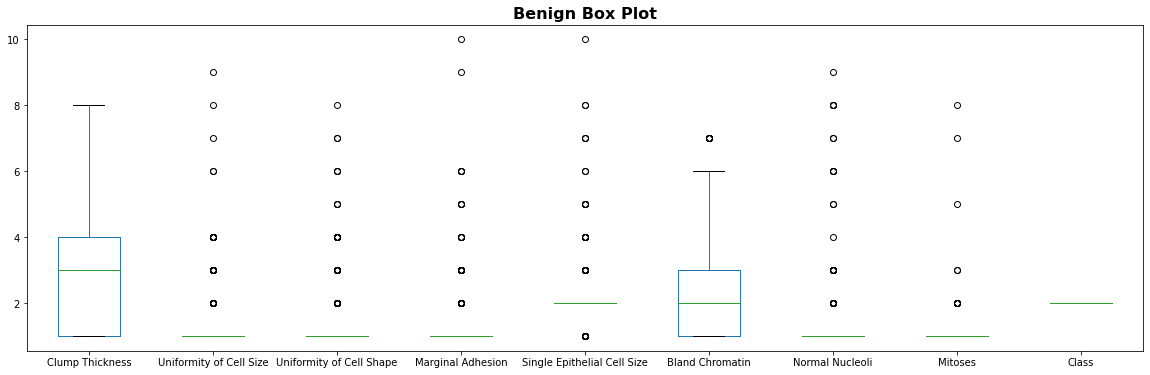

In [350]:
df_cancer_data_benign = df_cancer_data[df_cancer_data.Class == 2][list(df_cancer_data.columns)[1:]]
df_cancer_data_malignant = df_cancer_data[df_cancer_data.Class == 4][list(df_cancer_data.columns)[1:]]

boxplot1 = df_cancer_data_benign.plot(kind='box', figsize =(20, 6))
boxplot1.set_title('Benign Box Plot', fontdict={'fontsize':16, 'fontweight': 'bold'})

# show plot
plt.show()

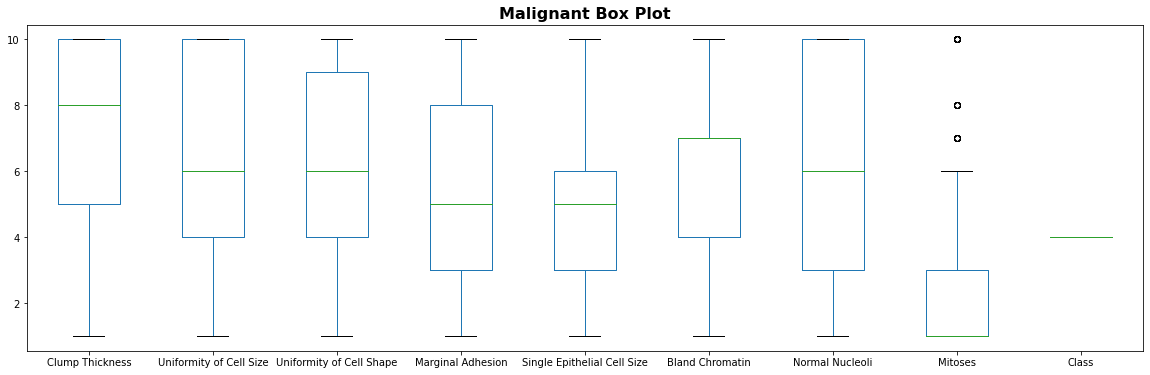

In [351]:
boxplot2 = df_cancer_data_malignant.plot(kind='box', figsize =(20,6))
boxplot2.set_title('Malignant Box Plot', fontdict={'fontsize':16, 'fontweight': 'bold'})

# show plot
plt.show()

## 3) DATA PREPROCESSING AND CLEANING

### 3-a) Preprocessing of the data - identifying NULL or Missing Values  

In [352]:
df_cancer_data.info()

# Inference
# There are no null or missing values. 
# Type of all columns is integer except 'Bare Nuclei'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [353]:
# Bare Nuclei contains string values
print("Unique values in Bare Nuclei: ", df_cancer_data['Bare Nuclei'].unique())

# Unknown value '?' can be replaced with 0
df_cancer_data = df_cancer_data.replace('?', 0)

print("Unique values after replacement: ", df_cancer_data['Bare Nuclei'].unique())

Unique values in Bare Nuclei:  ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
Unique values after replacement:  ['1' '10' '2' '4' '3' '9' '7' 0 '5' '8' '6']


In [354]:
# Get all columns except 'Sample code number'
df_cancer_data = df_cancer_data[list(df_cancer_data.columns)[1:]]

# Converting all columns to integer
df_cancer_data = df_cancer_data.applymap(int)

df_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              699 non-null    int64
 1   Uniformity of Cell Size      699 non-null    int64
 2   Uniformity of Cell Shape     699 non-null    int64
 3   Marginal Adhesion            699 non-null    int64
 4   Single Epithelial Cell Size  699 non-null    int64
 5   Bare Nuclei                  699 non-null    int64
 6   Bland Chromatin              699 non-null    int64
 7   Normal Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


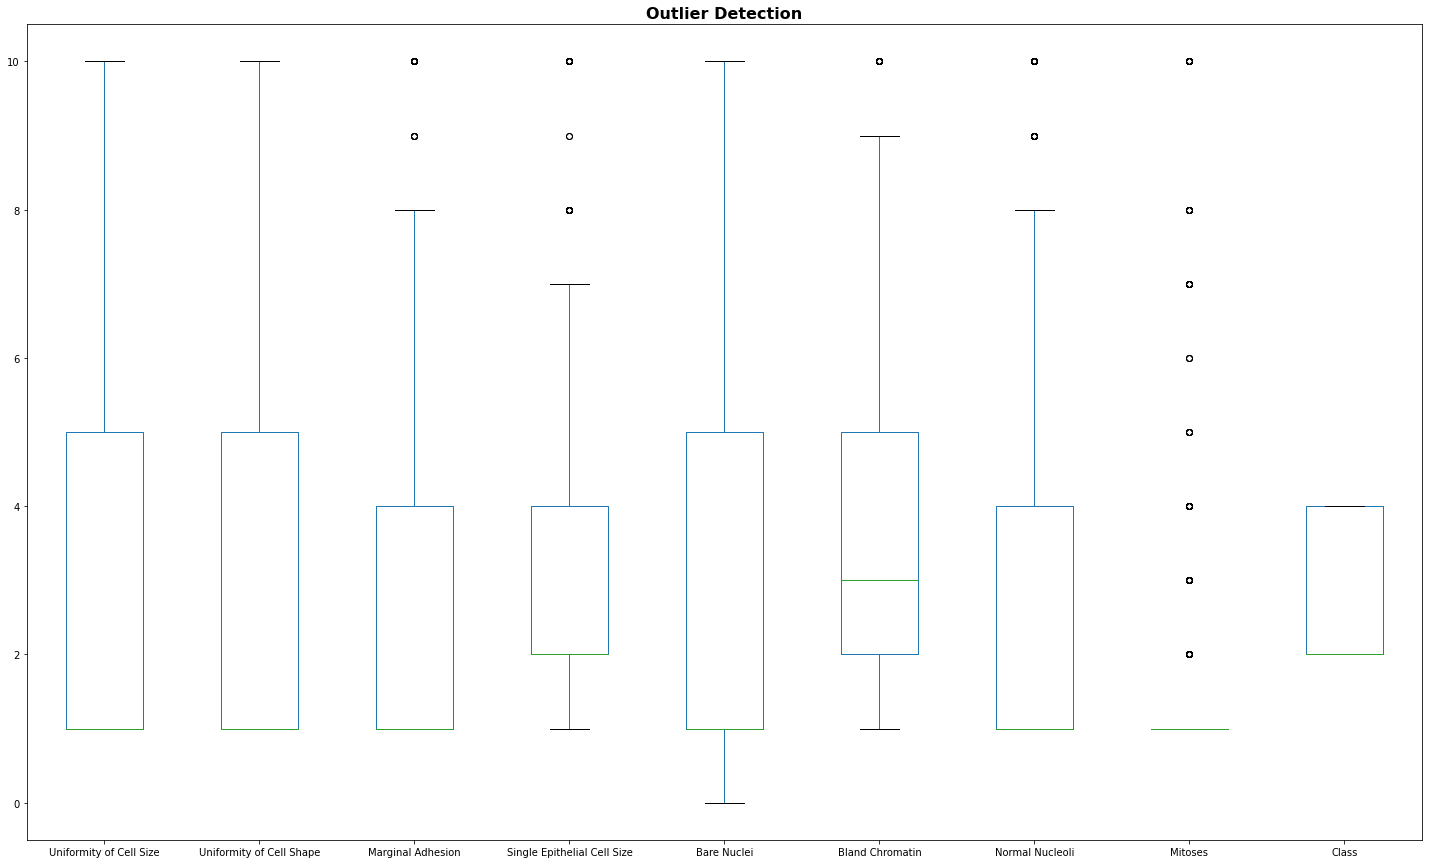

In [355]:
# Detecting Outliers using Box Plot

boxplot = df_cancer_data[df_cancer_data.columns[1:]].plot(kind='box', figsize=(25, 15))
boxplot.set_title('Outlier Detection', fontdict={'fontsize':16, 'fontweight': 'bold'})

# show plot
plt.show()

In [356]:
# Remove Outliers
print("Dataset shape with outliers: ", df_cancer_data.shape)
Q1 = df_cancer_data.quantile(0.25)
Q3 = df_cancer_data.quantile(0.75)
IQR = Q3 - Q1
df_cancer_data = df_cancer_data[~((df_cancer_data < (Q1 - 1.5 * IQR)) |(df_cancer_data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Dataset shape without outliers: ", df_cancer_data.shape)

Dataset shape with outliers:  (699, 10)
Dataset shape without outliers:  (504, 10)


### Inference

Columns - Marginal Adhesion, Single Epithelial Cell Size, Bland Chromatin, Normal Nucleoli, Mitoses are columns with outliers. Outliers are denoted by circles outside the boxplot whiskers.

Outliers are removed by considering only data that is within the range (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR) where IQR = Interquartile Range.

### 3-b) Feature transformation using Standardization

In [357]:
standard_scaler = preprocessing.StandardScaler()
standardised_values = standard_scaler.fit_transform(df_cancer_data[list(df_cancer_data.columns)[0:-1]])
scaled_df = pandas.DataFrame(standardised_values)
scaled_df

,0,1,2,3,4,5,6,7,8
0,0.713835,-0.442571,-0.511502,-0.455137,-0.267908,-0.422444,0.322968,-0.373795,0.0
1,0.713835,1.209693,1.060431,2.467019,4.696263,2.981121,0.322968,0.339814,0.0
2,-0.191254,-0.442571,-0.511502,-0.455137,-0.267908,-0.044270,0.322968,-0.373795,0.0
3,1.166379,3.412711,3.156341,-0.455137,0.724927,0.712077,0.322968,3.907859,0.0
4,0.261290,-0.442571,-0.511502,1.005941,-0.267908,-0.422444,0.322968,-0.373795,0.0
...,...,...,...,...,...,...,...,...,...
499,-1.096342,-0.442571,-0.511502,1.005941,-0.267908,-0.422444,-0.929153,-0.373795,0.0
500,0.713835,4.514220,4.204296,2.467019,1.717761,1.090251,0.949028,1.767032,0.0
501,-0.191254,-0.442571,-0.511502,-0.455137,-0.267908,-0.422444,-0.929153,-0.373795,0.0
502,-0.191254,-0.442571,-0.511502,-0.455137,0.724927,-0.044270,-0.929153,-0.373795,0.0


### Inference

Standardization is chosen because the data doesn't follow a normal distribution and is skewed.

### 3-c) Correlation Analysis

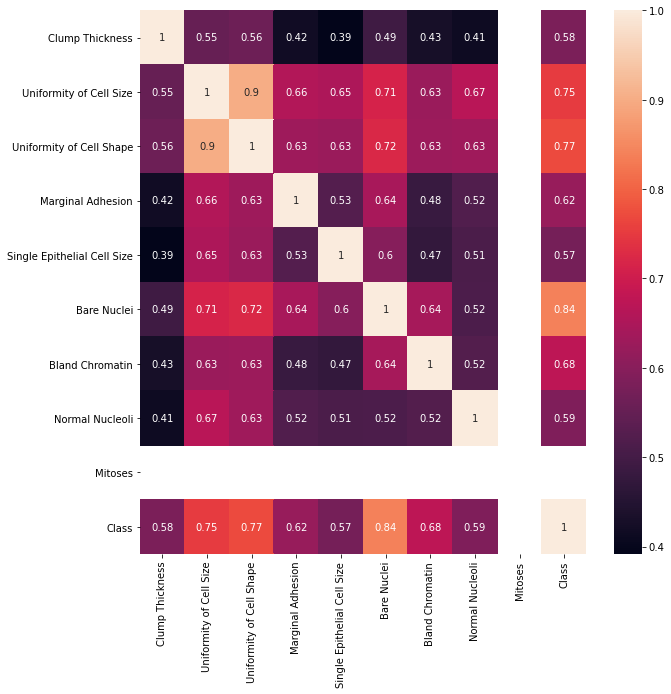

In [358]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cancer_data.corr(), annot=True)
plt.show()

### Inference

All features have **positive correlation with Class**.

> Clump Thickness, Single Epithelial Cell Size, Normal Nucleoli - **Weak correlation with Class**

> Uniformity of Cell Size, Uniformity of Cell Shape, Marginal Adhesion, Bland Chromatin - **Moderate correlation with Class**

>Bare Nuclei - **High correlation with Class**

## 4)	DATA PREPARATION

### 4-a) Do the final feature selection and extract feature and target variables

In [359]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = scaled_df
y = df_cancer_data['Class']

### 4-b) Split the dataset into train and test sets

In [360]:
# Split the dataset into train and test sets (70-30 rule)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [361]:
X_train

,0,1,2,3,4,5,6,7,8
18,2.071467,1.209693,1.584408,-0.455137,-0.267908,-0.800618,2.827209,1.053423,0.0
10,-0.643798,-0.442571,-0.511502,-0.455137,-0.267908,-0.422444,-0.303093,-0.373795,0.0
455,0.261290,0.108184,1.060431,1.005941,-0.267908,-0.044270,-0.303093,-0.373795,0.0
299,0.713835,0.108184,0.012476,1.736480,-0.267908,0.712077,-0.929153,-0.373795,0.0
214,0.713835,1.209693,2.108386,3.197558,1.717761,2.981121,0.949028,1.053423,0.0
...,...,...,...,...,...,...,...,...,...
244,-1.096342,-0.442571,-0.511502,-0.455137,-0.267908,-0.422444,-0.929153,-0.373795,0.0
359,-1.096342,-0.442571,-0.511502,-0.455137,-1.260742,-0.422444,-0.303093,-0.373795,0.0
64,0.713835,-0.442571,-0.511502,-0.455137,-0.267908,-0.422444,0.322968,-0.373795,0.0
281,-0.643798,0.658938,-0.511502,-0.455137,2.710595,-0.422444,-0.929153,-0.373795,0.0


In [362]:
X_test

,0,1,2,3,4,5,6,7,8
307,0.261290,-0.442571,-0.511502,1.005941,-1.260742,-0.422444,-0.303093,-0.373795,0.0
203,-1.096342,-0.442571,-0.511502,-0.455137,2.710595,-0.422444,0.322968,-0.373795,0.0
65,-0.643798,0.658938,1.060431,1.736480,-0.267908,1.090251,-0.303093,2.480641,0.0
415,0.713835,-0.442571,-0.511502,3.197558,0.724927,-0.422444,-0.929153,-0.373795,0.0
336,1.166379,0.658938,0.012476,-0.455137,0.724927,0.712077,0.949028,-0.373795,0.0
...,...,...,...,...,...,...,...,...,...
106,0.261290,-0.442571,-0.511502,-0.455137,-0.267908,-0.044270,0.322968,0.339814,0.0
329,0.261290,-0.442571,-0.511502,-0.455137,-0.267908,-0.422444,-0.929153,-0.373795,0.0
355,0.713835,-0.442571,-0.511502,-0.455137,-0.267908,-0.422444,-0.303093,-0.373795,0.0
289,-1.096342,0.658938,-0.511502,-0.455137,-0.267908,-0.422444,-0.303093,0.339814,0.0


In [363]:
y_train

23     4
11     2
637    2
441    2
333    4
      ..
375    2
517    2
97     2
419    2
624    2
Name: Class, Length: 352, dtype: int64

In [364]:
y_test

450    2
318    2
101    4
584    2
489    4
      ..
165    2
477    2
511    2
430    2
26     2
Name: Class, Length: 152, dtype: int64

# PART B

# MODEL - 1: DECISION TREE

## Part B - 1: MODEL BUILDING - DECISION TREE

###  Part B: 1-a) DECISION TREE

In [365]:
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree model for classification
model = DecisionTreeClassifier()

### Part B: 1-b) Train the model and print the training accuracy and loss values

In [366]:
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Prediction Score
print('Prediction Score:')
model.score(X_test, y_test)

Prediction Score:


0.9473684210526315

In [367]:
# Accuracy Score
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

# Error Rate
print('Error Rate:')
print(1-metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9473684210526315
Error Rate:
0.052631578947368474


## Part B - 2:	PERFORMANCE EVALUATION - DECISION TREE

### Part B: 2-a) Confusion Matrix - DECISION TREE

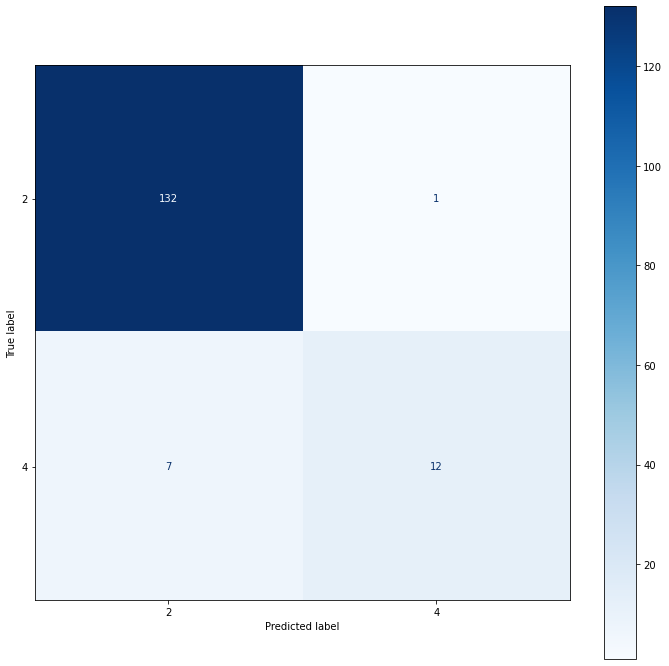

In [368]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=[2,4])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[2,4])
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(cmap=plt.cm.Blues, values_format='g', ax=ax)

### Inference

A confusion matrix is a performance measurement technique for Machine learning classification. It is a kind of table which helps you to the know the performance of the classification model on a set of test data for that the true values are known. 
The confusion matrix visualizes the accuracy of a classifier by comparing the actual and predicted classes. The binary confusion matrix is composed of squares:

- TP: True Positive: Predicted values correctly predicted as actual positive

- FP: Predicted values incorrectly predicted an actual positive. i.e., Negative values predicted as positive

- FN: False Negative: Positive values predicted as negative

- TN: True Negative: Predicted values correctly predicted as an actual negative

In this case:

**Class - 2**
>Total Samples = 133
>
>Out of which, 132 samples were predicted correctly, 1 were predicted incorrectly

**Class - 4**

>Total Samples = 19
>
>Out of which, 12 samples were predicted correctly, 7 were predicted incorrectly

### Part B: 2-b) Do the prediction for the test data and display the results for the inference

In [369]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [370]:
# Classification Report
report = classification_report(y_test, y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.95      0.99      0.97       133
           4       0.92      0.63      0.75        19

    accuracy                           0.95       152
   macro avg       0.94      0.81      0.86       152
weighted avg       0.95      0.95      0.94       152



In [371]:
report

{'2': {'precision': 0.9496402877697842,
  'recall': 0.9924812030075187,
  'f1-score': 0.9705882352941175,
  'support': 133},
 '4': {'precision': 0.9230769230769231,
  'recall': 0.631578947368421,
  'f1-score': 0.7499999999999999,
  'support': 19},
 'accuracy': 0.9473684210526315,
 'macro avg': {'precision': 0.9363586054233537,
  'recall': 0.8120300751879699,
  'f1-score': 0.8602941176470587,
  'support': 152},
 'weighted avg': {'precision': 0.9463198671831765,
  'recall': 0.9473684210526315,
  'f1-score': 0.9430147058823528,
  'support': 152}}

### Inference

- Precision:- Accuracy of positive predictions.
- Recall:- Fraction of positives that were correctly identified.
- F1 score :- A weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
- Support :- The number of actual occurrences of the class in the specified dataset

In this case:

**Class - 2:**
- Support --> Total Samples = 133
- Recall --> 99% of 133 Samples were predicted correctly ~ 132
- Precision --> 95% accurate
- F1 score --> 0.97 indicating highly accurate model
    
**Class - 4:**
- Support --> Total Samples = 19
- Recall --> 63% of 19 Samples were predicted correctly ~ 12
- Precision --> 92% accurate
- F1 score --> 0.75 indicating highly accurate model

# MODEL - 2: KNN

## Part B - 1: MODEL BUILDING - KNN

### Part B: 1-a) KNN

In [372]:
from sklearn.neighbors  import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 20)

### Part B: 1-b) Train the model and print the training accuracy and loss values

In [373]:
# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Prediction Score
print('Prediction Score:')
knn.score(X_test, y_test)

Prediction Score:


0.9407894736842105

In [374]:
# Accuracy Score
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

# Error Rate
print('Error Rate:')
print(1-metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9407894736842105
Error Rate:
0.05921052631578949


## Part B - 2: PERFORMANCE EVALUATION - KNN

### Part B: 2-a) Confusion Matrix - KNN

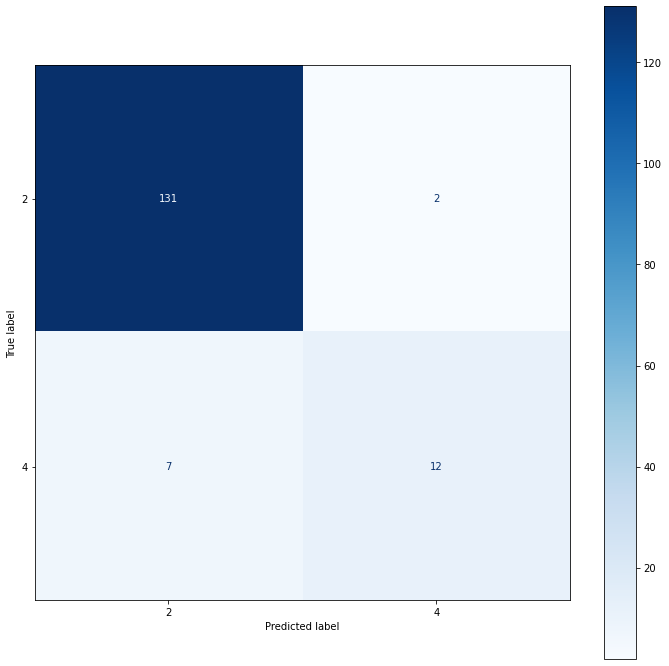

In [375]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=[2,4])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[2,4])
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(cmap=plt.cm.Blues, values_format='g', ax=ax)

### Inference

A confusion matrix is a performance measurement technique for Machine learning classification. It is a kind of table which helps you to the know the performance of the classification model on a set of test data for that the true values are known. 
The confusion matrix visualizes the accuracy of a classifier by comparing the actual and predicted classes. The binary confusion matrix is composed of squares:

- TP: True Positive: Predicted values correctly predicted as actual positive

- FP: Predicted values incorrectly predicted an actual positive. i.e., Negative values predicted as positive

- FN: False Negative: Positive values predicted as negative

- TN: True Negative: Predicted values correctly predicted as an actual negative

In this case:

**Class - 2**
>Total Samples = 133
>
>Out of which, 131 samples were predicted correctly, 2 were predicted incorrectly

**Class - 4**

>Total Samples = 19
>
>Out of which, 12 samples were predicted correctly, 7 were predicted incorrectly

### Part B: 2-b) Do the prediction for the test data and display the results for the inference

In [376]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [377]:
# Classification Report
print(classification_report(y_test, y_pred))
report = classification_report(y_test, y_pred,output_dict=True)

              precision    recall  f1-score   support

           2       0.95      0.98      0.97       133
           4       0.86      0.63      0.73        19

    accuracy                           0.94       152
   macro avg       0.90      0.81      0.85       152
weighted avg       0.94      0.94      0.94       152



In [378]:
report

{'2': {'precision': 0.9492753623188406,
  'recall': 0.9849624060150376,
  'f1-score': 0.9667896678966789,
  'support': 133},
 '4': {'precision': 0.8571428571428571,
  'recall': 0.631578947368421,
  'f1-score': 0.7272727272727273,
  'support': 19},
 'accuracy': 0.9407894736842105,
 'macro avg': {'precision': 0.9032091097308488,
  'recall': 0.8082706766917294,
  'f1-score': 0.8470311975847031,
  'support': 152},
 'weighted avg': {'precision': 0.9377587991718427,
  'recall': 0.9407894736842105,
  'f1-score': 0.936850050318685,
  'support': 152}}

### Inference

- Precision:- Accuracy of positive predictions.
- Recall:- Fraction of positives that were correctly identified.
- F1 score :- A weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
- Support :- The number of actual occurrences of the class in the specified dataset

In this case:

**Class - 2:**
- Support --> Total Samples = 133
- Recall --> 98% of 133 Samples were predicted correctly ~ 131
- Precision --> 95% accurate
- F1 score --> 0.97 indicating highly accurate model
    
**Class - 4:**
- Support --> Total Samples = 19
- Recall --> 63% of 19 Samples were predicted correctly ~ 12
- Precision --> 86% accurate
- F1 score --> 0.73 indicating highly accurate model

# MODEL - 3: SUPPORT VECTOR CLASSIFIER (SVC)

## Part B - 1: MODEL BUILDING - SVC

### Part B: 1-a) SVC

In [379]:
from sklearn.svm import SVC

svc=SVC() 

### Part B: 1-b)  Train the model and print the training accuracy and loss values

In [380]:
# Train the model
svc.fit(X_train,y_train)

# Make predictions on the test set
y_pred = svc.predict(X_test)

# Prediction Score
print('Prediction Score:')
svc.score(X_test, y_test)

Prediction Score:


0.9539473684210527

In [381]:
# Accuracy Score
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

# Error Rate
print('Error Rate:')
print(1-metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9539473684210527
Error Rate:
0.046052631578947345


## Part B - 2: PERFORMANCE EVALUATION - SVC

### Part B: 2-a) Confusion Matrix - SVC

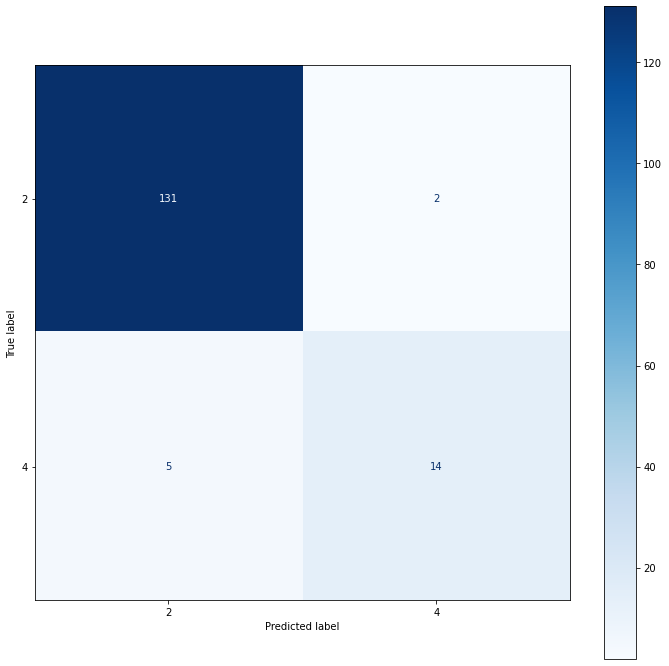

In [382]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=[2,4])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[2,4])
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(cmap=plt.cm.Blues, values_format='g', ax=ax)

### Inference

A confusion matrix is a performance measurement technique for Machine learning classification. It is a kind of table which helps you to the know the performance of the classification model on a set of test data for that the true values are known. 
The confusion matrix visualizes the accuracy of a classifier by comparing the actual and predicted classes. The binary confusion matrix is composed of squares:

- TP: True Positive: Predicted values correctly predicted as actual positive

- FP: Predicted values incorrectly predicted an actual positive. i.e., Negative values predicted as positive

- FN: False Negative: Positive values predicted as negative

- TN: True Negative: Predicted values correctly predicted as an actual negative

In this case:

**Class - 2**
>Total Samples = 133
>
>Out of which, 131 samples were predicted correctly, 2 were predicted incorrectly

**Class - 4**

>Total Samples = 19
>
>Out of which, 14 samples were predicted correctly, 5 were predicted incorrectly

### Part B: 2-b) Do the prediction for the test data and display the results for the inference

In [383]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [384]:
# Classification Report
print(classification_report(y_test, y_pred))
report = classification_report(y_test, y_pred,output_dict=True)

              precision    recall  f1-score   support

           2       0.96      0.98      0.97       133
           4       0.88      0.74      0.80        19

    accuracy                           0.95       152
   macro avg       0.92      0.86      0.89       152
weighted avg       0.95      0.95      0.95       152



In [385]:
report

{'2': {'precision': 0.9632352941176471,
  'recall': 0.9849624060150376,
  'f1-score': 0.9739776951672863,
  'support': 133},
 '4': {'precision': 0.875,
  'recall': 0.7368421052631579,
  'f1-score': 0.7999999999999999,
  'support': 19},
 'accuracy': 0.9539473684210527,
 'macro avg': {'precision': 0.9191176470588236,
  'recall': 0.8609022556390977,
  'f1-score': 0.8869888475836432,
  'support': 152},
 'weighted avg': {'precision': 0.9522058823529412,
  'recall': 0.9539473684210527,
  'f1-score': 0.9522304832713754,
  'support': 152}}

### Inference

- Precision:- Accuracy of positive predictions.
- Recall:- Fraction of positives that were correctly identified.
- F1 score :- A weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
- Support :- The number of actual occurrences of the class in the specified dataset

In this case:

**Class - 2:**
- Support --> Total Samples = 133
- Recall --> 98% of 133 Samples were predicted correctly ~ 131
- Precision --> 96% accurate
- F1 score --> 0.97 indicating highly accurate model
    
**Class - 4:**
- Support --> Total Samples = 19
- Recall --> 74% of 23 Samples were predicted correctly ~ 14
- Precision --> 88% accurate
- F1 score --> 0.80 indicating highly accurate model

# MODEL - 4: NAIVE BAYES CLASSIFIER (NBC)

## Part B - 1: MODEL BUILDING - NBC

### Part B: 1-a) NBC

In [386]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

### Part B: 1-b)  Train the model and print the training accuracy and loss values

In [387]:
# Train the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Prediction Score
print('Prediction Score:')
gnb.score(X_test, y_test)

Prediction Score:


0.9671052631578947

In [388]:
# Accuracy Score
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

# Error Rate
print('Error Rate:')
print(1-metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9671052631578947
Error Rate:
0.03289473684210531


## Part B - 2: PERFORMANCE EVALUATION - NBC

### Part B: 2-a) Confusion Matrix - NBC

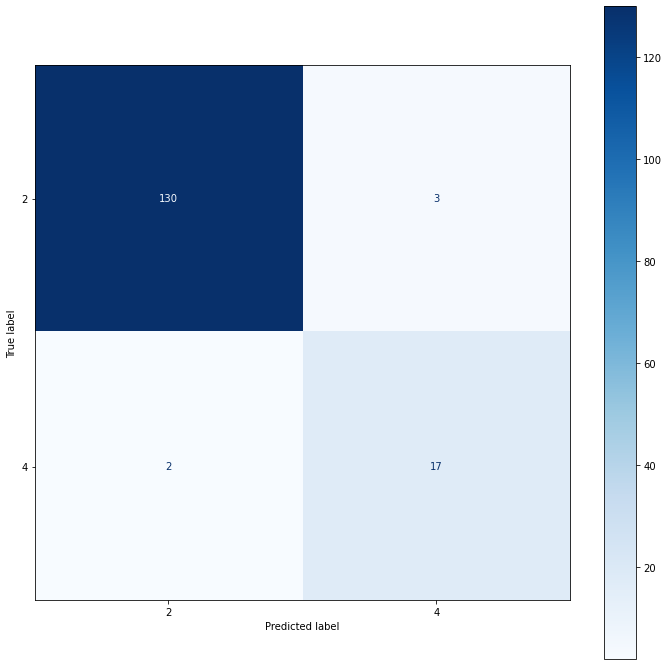

In [389]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=[2,4])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[2,4])
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(cmap=plt.cm.Blues, values_format='g', ax=ax)

### Inference

A confusion matrix is a performance measurement technique for Machine learning classification. It is a kind of table which helps you to the know the performance of the classification model on a set of test data for that the true values are known. 
The confusion matrix visualizes the accuracy of a classifier by comparing the actual and predicted classes. The binary confusion matrix is composed of squares:

- TP: True Positive: Predicted values correctly predicted as actual positive

- FP: Predicted values incorrectly predicted an actual positive. i.e., Negative values predicted as positive

- FN: False Negative: Positive values predicted as negative

- TN: True Negative: Predicted values correctly predicted as an actual negative

In this case:

**Class - 2**
>Total Samples = 133
>
>Out of which, 130 samples were predicted correctly, 3 were predicted incorrectly

**Class - 4**

>Total Samples = 19
>
>Out of which, 17 samples were predicted correctly, 2 were predicted incorrectly

### Part B: 2-b) Do the prediction for the test data and display the results for the inference

In [390]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred

array([2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [391]:
# Classification Report
print(classification_report(y_test, y_pred))
report = classification_report(y_test, y_pred,output_dict=True)

              precision    recall  f1-score   support

           2       0.98      0.98      0.98       133
           4       0.85      0.89      0.87        19

    accuracy                           0.97       152
   macro avg       0.92      0.94      0.93       152
weighted avg       0.97      0.97      0.97       152



In [392]:
report

{'2': {'precision': 0.9848484848484849,
  'recall': 0.9774436090225563,
  'f1-score': 0.981132075471698,
  'support': 133},
 '4': {'precision': 0.85,
  'recall': 0.8947368421052632,
  'f1-score': 0.8717948717948718,
  'support': 19},
 'accuracy': 0.9671052631578947,
 'macro avg': {'precision': 0.9174242424242425,
  'recall': 0.9360902255639098,
  'f1-score': 0.9264634736332849,
  'support': 152},
 'weighted avg': {'precision': 0.9679924242424244,
  'recall': 0.9671052631578947,
  'f1-score': 0.9674649250120948,
  'support': 152}}

### Inference

- Precision:- Accuracy of positive predictions.
- Recall:- Fraction of positives that were correctly identified.
- F1 score :- A weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
- Support :- The number of actual occurrences of the class in the specified dataset

In this case:

**Class - 2:**
- Support --> Total Samples = 133
- Recall --> 98% of 133 Samples were predicted correctly ~ 130
- Precision --> 98% accurate
- F1 score --> 0.98 indicating highly accurate model
    
**Class - 4:**
- Support --> Total Samples = 19
- Recall --> 89% of 19 Samples were predicted correctly ~ 17
- Precision --> 85% accurate
- F1 score --> 0.87 indicating highly accurate model

# CONCLUSION

## DECISION TREE MODEL HAS HIGHEST ACCURACY WHEN ALL CLASSES IN DATASET ARE CONSIDERED